<a href="https://colab.research.google.com/github/tealtourmaline/Mineria-y-calidad-de-datos/blob/main/MINERIA_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación: ResultadosSaber11
El objetivo de este modelo es predecir el resultado de nivel de inglés que van a obtener los estudiantes que presenten las pruebas saber 11.



In [63]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# Se cargan los datos
data= pd.read_excel("ResultadosSaberLimpios.xlsx",index_col=None, sheet_name=0)
data = data.drop(columns=['Unnamed: 0'])
data.head()

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CARACTER,COLE_JORNADA,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,DESEMP_INGLES
0,URBANO,N,TÉCNICO/ACADÉMICO,COMPLETA,Postgrado,Educación profesional completa,Estrato 4,Si,Si,Si,Si,437,B+
1,URBANO,N,TÉCNICO,MAÑANA,Postgrado,Secundaria (Bachillerato) completa,Estrato 3,Si,Si,Si,Si,355,A2
2,URBANO,S,ACADÉMICO,COMPLETA,Educación profesional incompleta,Educación profesional completa,Estrato 6,Si,Si,Si,Si,363,B+
3,RURAL,S,ACADÉMICO,MAÑANA,Educación profesional completa,Educación profesional completa,Estrato 6,Si,Si,Si,Si,350,B1
4,RURAL,S,ACADÉMICO,COMPLETA,Postgrado,Educación profesional completa,Estrato 6,Si,Si,Si,Si,378,B+


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21930 entries, 0 to 21929
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COLE_AREA_UBICACION   21930 non-null  object
 1   COLE_BILINGUE         21930 non-null  object
 2   COLE_CARACTER         21930 non-null  object
 3   COLE_JORNADA          21930 non-null  object
 4   FAMI_EDUCACIONMADRE   21930 non-null  object
 5   FAMI_EDUCACIONPADRE   21930 non-null  object
 6   FAMI_ESTRATOVIVIENDA  21930 non-null  object
 7   FAMI_TIENEAUTOMOVIL   21930 non-null  object
 8   FAMI_TIENECOMPUTADOR  21930 non-null  object
 9   FAMI_TIENEINTERNET    21930 non-null  object
 10  FAMI_TIENELAVADORA    21930 non-null  object
 11  PUNT_GLOBAL           21930 non-null  int64 
 12  DESEMP_INGLES         21930 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.2+ MB


In [66]:
#Corrección del tipo de datos object a categorías
data['COLE_AREA_UBICACION']=data['COLE_AREA_UBICACION'].astype('category')
data['COLE_BILINGUE']=data['COLE_BILINGUE'].astype('category')
data['COLE_CARACTER']=data['COLE_CARACTER'].astype('category')
data['COLE_JORNADA']=data['COLE_JORNADA'].astype('category')
data['FAMI_EDUCACIONMADRE']=data['FAMI_EDUCACIONMADRE'].astype('category')
data['FAMI_EDUCACIONPADRE']=data['FAMI_EDUCACIONPADRE'].astype('category')
data['FAMI_ESTRATOVIVIENDA']=data['FAMI_ESTRATOVIVIENDA'].astype('category')
data['FAMI_TIENEAUTOMOVIL']=data['FAMI_TIENEAUTOMOVIL'].astype('category')
data['FAMI_TIENECOMPUTADOR']=data['FAMI_TIENECOMPUTADOR'].astype('category')
data['FAMI_TIENEINTERNET']=data['FAMI_TIENEINTERNET'].astype('category')
data['FAMI_TIENELAVADORA']=data['FAMI_TIENELAVADORA'].astype('category')
data['DESEMP_INGLES']=data['DESEMP_INGLES'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21930 entries, 0 to 21929
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   COLE_AREA_UBICACION   21930 non-null  category
 1   COLE_BILINGUE         21930 non-null  category
 2   COLE_CARACTER         21930 non-null  category
 3   COLE_JORNADA          21930 non-null  category
 4   FAMI_EDUCACIONMADRE   21930 non-null  category
 5   FAMI_EDUCACIONPADRE   21930 non-null  category
 6   FAMI_ESTRATOVIVIENDA  21930 non-null  category
 7   FAMI_TIENEAUTOMOVIL   21930 non-null  category
 8   FAMI_TIENECOMPUTADOR  21930 non-null  category
 9   FAMI_TIENEINTERNET    21930 non-null  category
 10  FAMI_TIENELAVADORA    21930 non-null  category
 11  PUNT_GLOBAL           21930 non-null  int64   
 12  DESEMP_INGLES         21930 non-null  category
dtypes: category(12), int64(1)
memory usage: 430.7 KB


In [67]:
#Se crean dummies a las variables predictoras categóricas (no a la variable obj)
data = pd.get_dummies(data, columns=['COLE_AREA_UBICACION'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['COLE_BILINGUE'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['COLE_CARACTER'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['COLE_JORNADA'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['FAMI_EDUCACIONMADRE'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['FAMI_EDUCACIONPADRE'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['FAMI_ESTRATOVIVIENDA'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['FAMI_TIENEAUTOMOVIL'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['FAMI_TIENECOMPUTADOR'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['FAMI_TIENEINTERNET'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['FAMI_TIENELAVADORA'], drop_first=True, dtype=int)
data.head()

,PUNT_GLOBAL,DESEMP_INGLES,COLE_AREA_UBICACION_URBANO,COLE_BILINGUE_S,COLE_CARACTER_ACADÉMICO,COLE_CARACTER_NO APLICA,COLE_CARACTER_TÉCNICO,COLE_CARACTER_TÉCNICO/ACADÉMICO,COLE_JORNADA_COMPLETA,COLE_JORNADA_MAÑANA,...,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si,FAMI_TIENELAVADORA_Si
0,437,B+,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,1,1,1
1,355,A2,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,1,1,1
2,363,B+,1,1,1,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,1
3,350,B1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,1,1,1,1
4,378,B+,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,1


In [68]:
#Se codifican las categorias de la VARIABLE OBJETIVO

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["DESEMP_INGLES"]=labelencoder.fit_transform(data["DESEMP_INGLES"])

data.head()

,PUNT_GLOBAL,DESEMP_INGLES,COLE_AREA_UBICACION_URBANO,COLE_BILINGUE_S,COLE_CARACTER_ACADÉMICO,COLE_CARACTER_NO APLICA,COLE_CARACTER_TÉCNICO,COLE_CARACTER_TÉCNICO/ACADÉMICO,COLE_JORNADA_COMPLETA,COLE_JORNADA_MAÑANA,...,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si,FAMI_TIENELAVADORA_Si
0,437,3,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,1,1,1
1,355,2,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,1,1,1
2,363,3,1,1,1,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,1
3,350,4,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,1,1,1,1
4,378,3,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,1


# División 70-30

<Axes: xlabel='DESEMP_INGLES'>

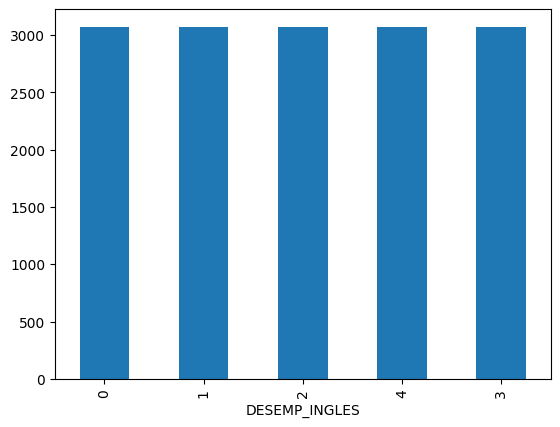

In [69]:
from sklearn.model_selection import train_test_split
X = data.drop("DESEMP_INGLES", axis = 1) # Variables predictoras
Y = data['DESEMP_INGLES'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')

<Axes: xlabel='DESEMP_INGLES'>

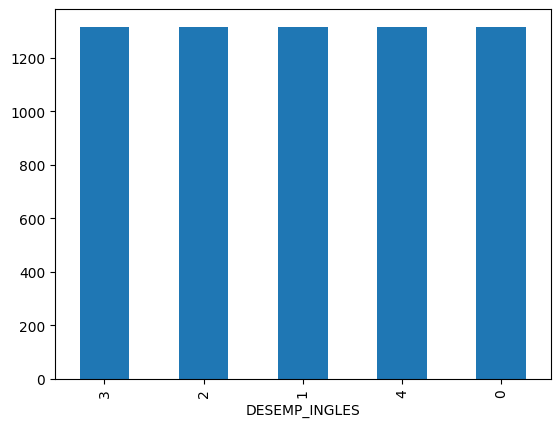

In [70]:
Y_test.value_counts().plot(kind='bar')

# Aprendizaje con el 70 y evaluación con el 30

### TREE
- recordar que en el árbol no se normaliza
- se debe discretizar, pero él solito lo hace

In [71]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier

modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=10) #gini, entropy
modelTree.fit(X_train, Y_train) #70% train

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

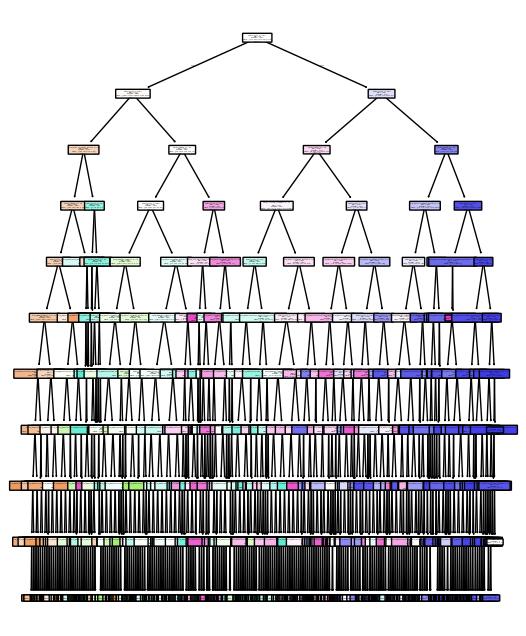

In [72]:
from sklearn.tree import plot_tree
plt.figure(figsize=(6,8))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

In [73]:
#Evaluación 30%
from sklearn import metrics

Y_pred = modelTree.predict(X_test) #30% Test
print(Y_pred)

[3 0 0 ... 1 1 0]


In [74]:
#Exactitud
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
print(exactitud)

0.5455236358109136


In [75]:
#Matriz de confusion
from sklearn import metrics

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
cm

array([[878, 345,  81,   0,  11],
       [442, 526, 287,   4,  57],
       [106, 328, 628,  47, 207],
       [  3,   8,  52, 966, 287],
       [ 14,  87, 319, 305, 591]])

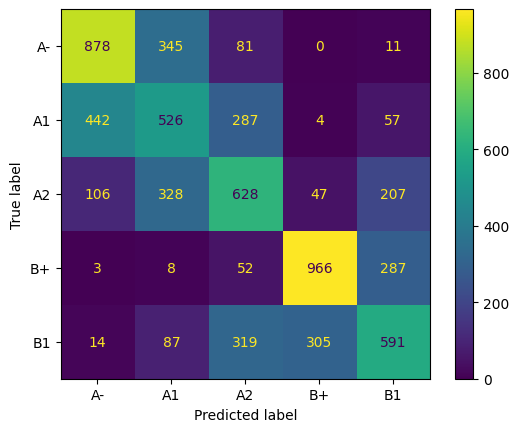

In [76]:
#Plot de la matriz de confusion
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

**Conclusión sobre la calidad del modelo:**
El modelo cuenta con una exactitud del 54% y logra predecir mejor las categorías A- y B+
Es una calidad aceptable

### RANDOM FOREST

In [77]:
from sklearn.ensemble import RandomForestClassifier

model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=10, min_samples_leaf=2)
model_rf.fit(X_train, Y_train) #70%

RandomForestClassifier(max_depth=10, max_samples=0.7, min_samples_leaf=2)

              precision    recall  f1-score   support

          A-       0.62      0.77      0.69      1315
          A1       0.51      0.35      0.42      1316
          A2       0.49      0.56      0.52      1316
          B+       0.72      0.76      0.74      1316
          B1       0.52      0.46      0.49      1316

    accuracy                           0.58      6579
   macro avg       0.57      0.58      0.57      6579
weighted avg       0.57      0.58      0.57      6579



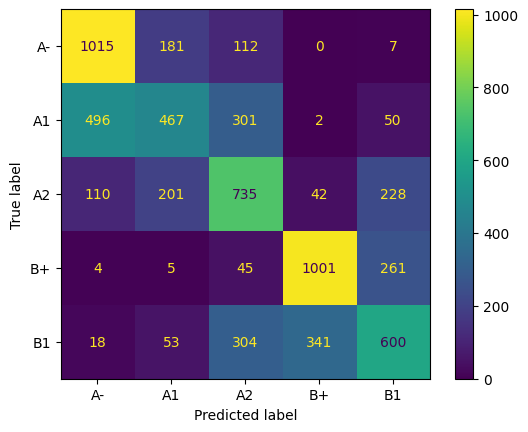

In [78]:
#Evaluación de RandomForest con 30%
from sklearn import metrics

Y_pred = model_rf.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))


**Conclusión sobre la calidad del modelo:**
El modelo cuenta con una exactitud del 58% y logra predecir mejor las categorías A- y B+, también predice mejor que el árbol la categoría A2
Es una calidad aceptable

### KNN
- se debe normalizar porque usa medidas de distancia
- se normaliza con min_max_scaler que las lleva a valores de 0 a 1
- las dummies no se normalizan

In [79]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

#el fit se debe hacer sobre data, y luego se aplica la transformación a los conjuntos train y test
min_max_scaler.fit(data[['PUNT_GLOBAL']]) #Ajuste de los parametros: max - min

#Se aplica la normalización a 70%  y 30%
X_train[['PUNT_GLOBAL']]= min_max_scaler.transform(X_train[['PUNT_GLOBAL']]) #70%
X_test[['PUNT_GLOBAL']]= min_max_scaler.transform(X_test[['PUNT_GLOBAL']]) #30%
X_train.head()

,PUNT_GLOBAL,COLE_AREA_UBICACION_URBANO,COLE_BILINGUE_S,COLE_CARACTER_ACADÉMICO,COLE_CARACTER_NO APLICA,COLE_CARACTER_TÉCNICO,COLE_CARACTER_TÉCNICO/ACADÉMICO,COLE_JORNADA_COMPLETA,COLE_JORNADA_MAÑANA,COLE_JORNADA_TARDE,...,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si,FAMI_TIENELAVADORA_Si
3212,0.259155,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,1,1
10929,0.473239,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,1,1,1
9319,0.580282,1,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,1,1,1
6705,0.439437,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,1,1,1
3584,0.583099,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,1,1


In [85]:
#Aprendizaje KNN con 70%
from sklearn.neighbors  import KNeighborsClassifier #KNeighborsRegressor

modelKnn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')#euclidean, minkowski
modelKnn.fit(X_train, Y_train) #70%


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

              precision    recall  f1-score   support

          A-       0.75      0.77      0.76      1315
          A1       0.61      0.59      0.60      1316
          A2       0.58      0.62      0.60      1316
          B+       0.67      0.63      0.65      1316
          B1       0.52      0.51      0.52      1316

    accuracy                           0.63      6579
   macro avg       0.63      0.63      0.63      6579
weighted avg       0.63      0.63      0.63      6579



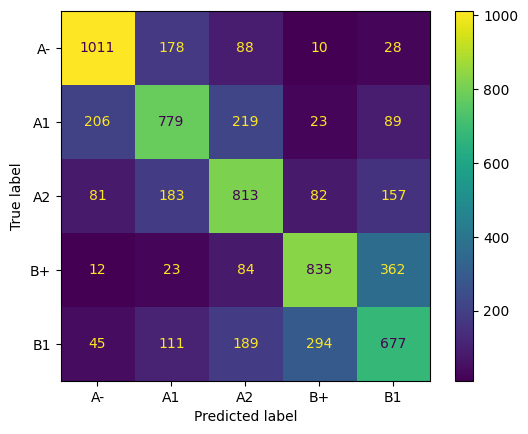

In [86]:
#Evaluación de Knn con 30%
from sklearn import metrics

Y_pred = modelKnn.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))


**Conclusión sobre la calidad del modelo:**
El modelo cuenta con una exactitud del 63% y logra predecir mejor que los anteriores modelos casi todas las categorías.
Es una calidad buena.

### RED NEURONAL
- se debe normalizar, pero como ya lo hicimos anteriormente, aplicamos la red directamente

In [115]:
#Red Neuronal

from sklearn.neural_network import MLPClassifier #MLPRegressor

#Solo se configura capas ocultas, no se configura capa de entrada y de salida
modelNN = MLPClassifier(activation="logistic",hidden_layer_sizes=(5), learning_rate='constant',
                     learning_rate_init=0.2, momentum= 0.3, max_iter=500, random_state=3)

modelNN.fit(X_train, Y_train) #70% normalizados


MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=500, momentum=0.3,
              random_state=3)

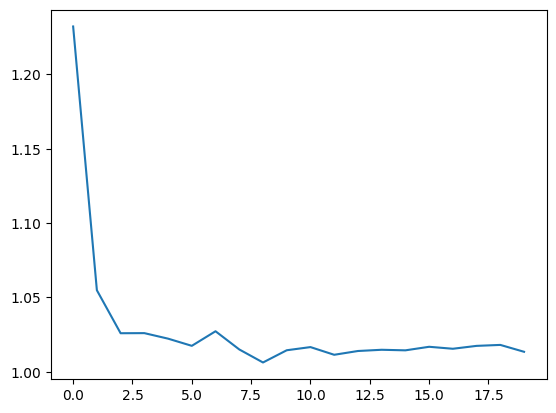

In [117]:
#Loss es la desviación entre Y_train y el Y_pred
loss_values = modelNN.loss_curve_
plt.plot(loss_values)

              precision    recall  f1-score   support

          A-       0.63      0.58      0.60      1315
          A1       0.42      0.26      0.32      1316
          A2       0.42      0.56      0.48      1316
          B+       0.76      0.68      0.72      1316
          B1       0.47      0.57      0.51      1316

    accuracy                           0.53      6579
   macro avg       0.54      0.53      0.53      6579
weighted avg       0.54      0.53      0.53      6579



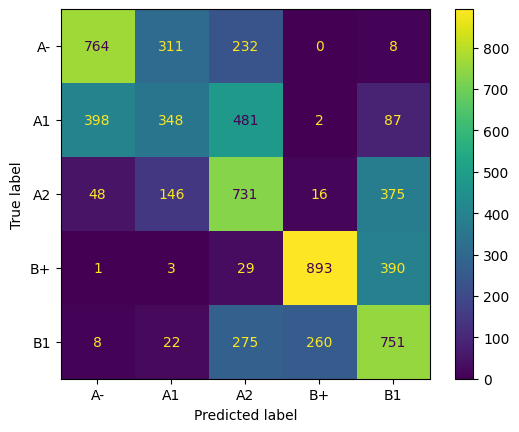

In [116]:
#Evaluación de Red Neuronal
from sklearn import metrics

Y_pred = modelNN.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))


**Conclusión sobre la calidad del modelo:**
El modelo cuenta con una exactitud del 53% y logra predecir mejor las categorías A- y B+
Es una calidad aceptable pero menor que las de los anteriores modelos

### SUPPORT VECTOR MACHINE
- Se debe normalizar, pero ya lo hicimos por lo que podemos aplicar directamente svm

In [118]:
#SVM
from sklearn.svm import SVC # SVR

modelSVM = SVC(kernel='linear') #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
modelSVM.fit(X_train, Y_train) #70%

SVC(kernel='linear')

              precision    recall  f1-score   support

          A-       0.58      0.64      0.61      1315
          A1       0.42      0.35      0.38      1316
          A2       0.45      0.50      0.47      1316
          B+       0.75      0.73      0.74      1316
          B1       0.50      0.49      0.49      1316

    accuracy                           0.54      6579
   macro avg       0.54      0.54      0.54      6579
weighted avg       0.54      0.54      0.54      6579



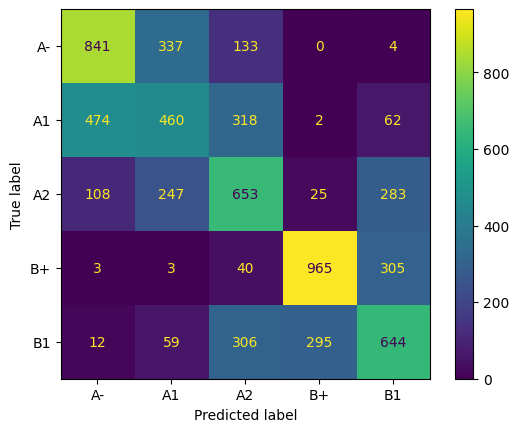

In [119]:
#Evaluación de SVM
from sklearn import metrics

Y_pred = modelSVM.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))


**Conclusión sobre la calidad del modelo:**
El modelo cuenta con una exactitud del 50% y logra predecir mejor las categorías A- y B+
Es una calidad aceptable

#3. Hiperparametrización con el mejor modelo - KNN

In [80]:
#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])

In [123]:
#KNN
from sklearn.neighbors  import KNeighborsClassifier
modelKnn_ = KNeighborsClassifier()

# Definir los hiperparametros
n_neighbors=[1,2,3,4,5,6,7,13,27]
metric=['euclidean','minkowski']

#Grid
from sklearn.model_selection import GridSearchCV

param_grid = dict(n_neighbors=n_neighbors, metric=metric)
grid = GridSearchCV(estimator=modelKnn, param_grid=param_grid, scoring='f1_macro', n_jobs=-1,cv=10)
grid.fit(X_train, Y_train) #70%

#Mejor modelo
modelKnn= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas['Knn']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)


{'metric': 'euclidean', 'n_neighbors': 1}
                  Knn
f1 de la CV  0.622972


              precision    recall  f1-score   support

          A-       0.75      0.77      0.76      1315
          A1       0.61      0.59      0.60      1316
          A2       0.58      0.62      0.60      1316
          B+       0.67      0.63      0.65      1316
          B1       0.52      0.51      0.52      1316

    accuracy                           0.63      6579
   macro avg       0.63      0.63      0.63      6579
weighted avg       0.63      0.63      0.63      6579



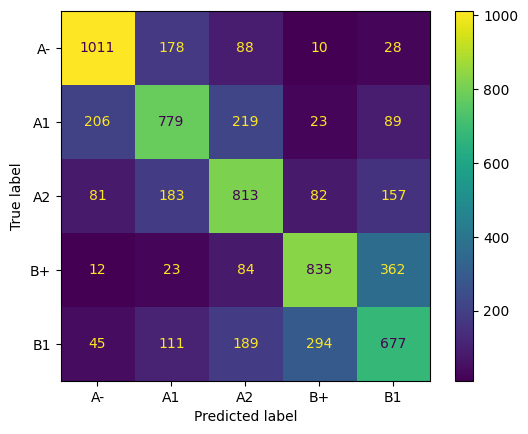

In [124]:
#Evaluación de Knn
from sklearn import metrics

Y_pred = modelKnn.predict(X_test)

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))


**Conclusión sobre la calidad del modelo:**
El modelo cuenta con una exactitud del 63% y logra predecir mejor que los anteriores modelos casi todas las categorías.
Es una calidad buena, aunque no se nota mucho el cambio con respecto a la calidad antes de la hiperparametrización

# Guardamos el modelo

In [125]:
import pickle
filename = 'modelo-knn.pkl'
variables= X.columns._values
pickle.dump([modelKnn,labelencoder,variables,min_max_scaler], open(filename, 'wb')) #write